# INTRUSION DETECTOR on One-Class SVM

Author: H.Moghadasi

https://kdd.ics.uci.edu/databases/kddcup99/kddcup.names

## Attack_types

back                dos
buffer_overflow     u2r
ftp_write           r2l
guess_passwd        r2l
imap                r2l
ipsweep             probe
land                dos
loadmodule          u2r
multihop            r2l
neptune             dos
nmap                probe
perl                u2r
phf                 r2l
pod                 dos
portsweep           probe
rootkit             u2r
satan               probe
smurf               dos
spy                 r2l
teardrop            dos
warezclient         r2l
warezmaster         r2l

## DERIVED FEATURES of the UCI Knowledge Discovery in Databases (KDD) 
duration:                               continuous.
protocol_type:                          symbolic.
service:                                symbolic.
flag:                                   symbolic.
src_bytes:                              continuous.
dst_bytes:                              continuous.
land:                                   symbolic.
wrong_fragment:                         continuous.
urgent:                                 continuous.
hot:                                    continuous.
num_failed_logins:                      continuous.
logged_in:                              symbolic.
num_compromised:                        continuous.
root_shell:                             continuous.
su_attempted:                           continuous.
num_root:                               continuous.
num_file_creations:                     continuous.
num_shells:                             continuous.
num_access_files:                       continuous.
num_outbound_cmds:                      continuous.
is_host_login:                          symbolic.
is_guest_login:                         symbolic.
count:                                  continuous.
srv_count:                              continuous.
serror_rate:                            continuous.
srv_serror_rate:                        continuous.
rerror_rate:                            continuous.
srv_rerror_rate:                        continuous.
same_srv_rate:                          continuous.
diff_srv_rate:                          continuous.
srv_diff_host_rate:                     continuous.
dst_host_count:                         continuous.
dst_host_srv_count:                     continuous.
dst_host_same_srv_rate:                 continuous.
dst_host_diff_srv_rate:                 continuous.
dst_host_same_src_port_rate:            continuous.
dst_host_srv_diff_host_rate:            continuous.
dst_host_serror_rate:                   continuous.
dst_host_srv_serror_rate:               continuous.
dst_host_rerror_rate:                   continuous.
dst_host_srv_rerror_rate:               continuous.

In [9]:
import pandas as pd

# نام ستون‌ها بر اساس مستندات KDD
column_names = ['duration','protocol_type','service','flag','src_bytes',
                'dst_bytes','land','wrong_fragment','urgent','hot',
                'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted',
                'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds',
                'is_host_login','is_guest_login','count','srv_count','serror_rate',
                'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
                'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
                'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
                'dst_host_rerror_rate','dst_host_srv_rerror_rate','label'
                ]

df_train = pd.read_csv('kddcup.data.gz', names=column_names, index_col=False)
df_test = pd.read_csv('corrected.gz', names=column_names, index_col=False)

print("*.*"*20)
df_train.info()
print("\n"*2,"*.*"*20)
df_test.info()

*.**.**.**.**.**.**.**.**.**.**.**.**.**.**.**.**.**.**.**.*
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898431 entries, 0 to 4898430
Data columns (total 42 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   duration                     int64  
 1   protocol_type                object 
 2   service                      object 
 3   flag                         object 
 4   src_bytes                    int64  
 5   dst_bytes                    int64  
 6   land                         int64  
 7   wrong_fragment               int64  
 8   urgent                       int64  
 9   hot                          int64  
 10  num_failed_logins            int64  
 11  logged_in                    int64  
 12  num_compromised              int64  
 13  root_shell                   int64  
 14  su_attempted                 int64  
 15  num_root                     int64  
 16  num_file_creations           int64  
 17  num_shells             

In [10]:
print(f"object columns: \t{list(set(df_train.columns)-set(df_train._get_numeric_data().columns))}")
print("\n","*.*"*20)
print("نمایش اطلاعات اولیه دادههای آموزش")
print(f"[Sample_num X Feature_num]:\t [{df_train.shape[0]} X {df_train.shape[1]}]\n")

print("\nprotocol_type:\t", df_train['protocol_type'].unique())
print("\nservice types:\t", df_train['service'].unique()) #[:10]
print("\nflag types:\t", df_train['flag'].unique()) #[:10]
print("\n","فراوانی برچسب‌ها:")
print(df_train['label'].value_counts())

print("\n","*.*"*20)
print("نمایش اطلاعات اولیه دادههای تست")
print(f"[Sample_num X Feature_num]:\t [{df_test.shape[0]} X {df_test.shape[1]}]\n")
print("\nservice types:\t", df_test['protocol_type'].unique())
print("\nservice types:\t", df_test['service'].unique()) #[:10]
print("\nflag types:\t", df_test['flag'].unique()) #[:10]
print("\n","فراوانی برچسب‌ها:")
print(df_test['label'].value_counts())


object columns: 	['service', 'protocol_type', 'label', 'flag']

 *.**.**.**.**.**.**.**.**.**.**.**.**.**.**.**.**.**.**.**.*
نمایش اطلاعات اولیه دادههای آموزش
[Sample_num X Feature_num]:	 [4898431 X 42]


protocol_type:	 ['tcp' 'udp' 'icmp']

service types:	 ['http' 'smtp' 'domain_u' 'auth' 'finger' 'telnet' 'eco_i' 'ftp' 'ntp_u'
 'ecr_i' 'other' 'urp_i' 'private' 'pop_3' 'ftp_data' 'netstat' 'daytime'
 'ssh' 'echo' 'time' 'name' 'whois' 'domain' 'mtp' 'gopher' 'remote_job'
 'rje' 'ctf' 'supdup' 'link' 'systat' 'discard' 'X11' 'shell' 'login'
 'imap4' 'nntp' 'uucp' 'pm_dump' 'IRC' 'Z39_50' 'netbios_dgm' 'ldap'
 'sunrpc' 'courier' 'exec' 'bgp' 'csnet_ns' 'http_443' 'klogin' 'printer'
 'netbios_ssn' 'pop_2' 'nnsp' 'efs' 'hostnames' 'uucp_path' 'sql_net'
 'vmnet' 'iso_tsap' 'netbios_ns' 'kshell' 'urh_i' 'http_2784' 'harvest'
 'aol' 'tftp_u' 'http_8001' 'tim_i' 'red_i']

flag types:	 ['SF' 'S2' 'S1' 'S3' 'OTH' 'REJ' 'RSTO' 'S0' 'RSTR' 'RSTOS0' 'SH']

 فراوانی برچسب‌ها:
label
smurf.       

In [11]:
print("============================ Statistical analysis ============================")
print("Statistical description of KDD Cup_99 Train Data")
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', 100)
print(f"{df_train.describe()}")
print("\n\n","="*100)
print("\nStatistical description of KDD Cup_99 Test Data")

print(f"{df_test.describe()}")


============================ Statistical analysis ============================
Statistical description of KDD Cup_99 Train Data
           duration     src_bytes     dst_bytes          land  wrong_fragment        urgent           hot  num_failed_logins     logged_in  num_compromised    root_shell  su_attempted      num_root  \
count  4.898431e+06  4.898431e+06  4.898431e+06  4.898431e+06    4.898431e+06  4.898431e+06  4.898431e+06       4.898431e+06  4.898431e+06     4.898431e+06  4.898431e+06  4.898431e+06  4.898431e+06   
mean   4.834243e+01  1.834621e+03  1.093623e+03  5.716116e-06    6.487792e-04  7.961733e-06  1.243766e-02       3.205108e-05  1.435290e-01     8.088304e-03  6.818510e-05  3.674646e-05  1.293496e-02   
std    7.233298e+02  9.414311e+05  6.450123e+05  2.390833e-03    4.285434e-02  7.215084e-03  4.689782e-01       7.299408e-03  3.506116e-01     3.856481e+00  8.257146e-03  8.082432e-03  3.938075e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00    0.0

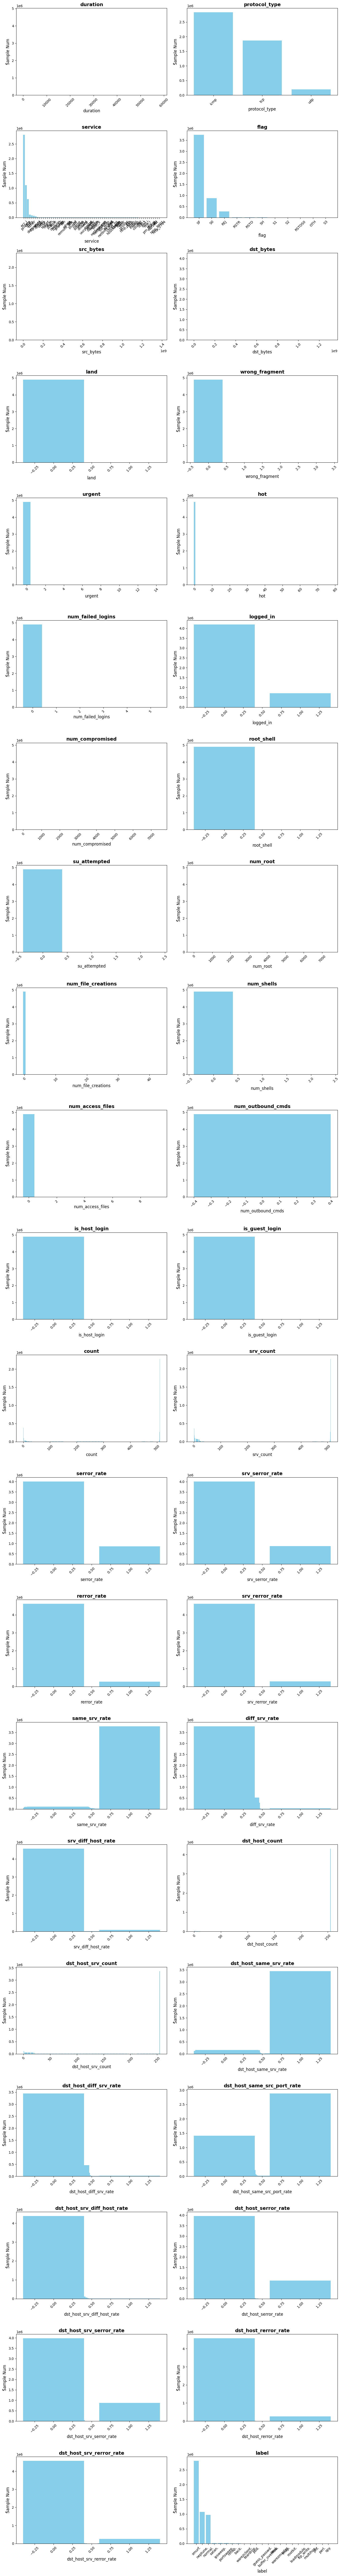

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

#sns.set_theme(style="whitegrid")

# محاسبه تعداد سطرها و ستون‌ها برای چیدمان (مثلاً 2 ستون در هر ردیف)
n_cols = 2
n_rows = int(np.ceil(len(column_names) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(7 * n_cols, 5 * n_rows))
axes = axes.flatten() 

for i, col in enumerate(column_names):
    ax = axes[i]
    value_counts = df_train[col].value_counts()
    # sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, hue=value_counts.index, palette="viridis", legend=False)
    bars = ax.bar(value_counts.index, value_counts.values, color='skyblue')
    ax.set_title(f"{col}", fontsize=14, fontweight='bold')
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("ُSample Num", fontsize=12)
    ax.tick_params(axis='x', rotation=45, labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

# حذف محورهای خالی اگر تعداد ستون‌ها کامل نباشد
"""for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])"""

# plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
# fig.suptitle("Visualization of KDD_Cup99)", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

In [13]:
# کدگذاری ویژگی‌های دسته‌ای
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

df_train_encoded = df_train
# کد گذاری ویژگی‌های به روش عددی
label_enc = LabelEncoder()
df_train_encoded['protocol_type'] = label_enc.fit_transform(df_train['protocol_type'])
df_train_encoded['service'] = label_enc.fit_transform(df_train['service'])
df_train_encoded['flag'] = label_enc.fit_transform(df_train['flag'])

# کد گذاری ویژگی‌های به روش One-Hot Encoding
# df_train_encoded = pd.get_dummies(df_train, columns=['protocol_type', 'service', 'flag'])

df_train_encoded.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,24,9,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,1,24,9,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,1,24,9,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,1,24,9,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,1,24,9,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [14]:
#Splitting features and target
import numpy as np

X = df_train_encoded.drop(['label'], axis=1)
y = label_enc.fit_transform(df_train_encoded['label'])

n_class_names = np.unique(y)
print(n_class_names)
class_names = label_enc.inverse_transform(n_class_names)
print(class_names)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
['back.' 'buffer_overflow.' 'ftp_write.' 'guess_passwd.' 'imap.'
 'ipsweep.' 'land.' 'loadmodule.' 'multihop.' 'neptune.' 'nmap.' 'normal.'
 'perl.' 'phf.' 'pod.' 'portsweep.' 'rootkit.' 'satan.' 'smurf.' 'spy.'
 'teardrop.' 'warezclient.' 'warezmaster.']


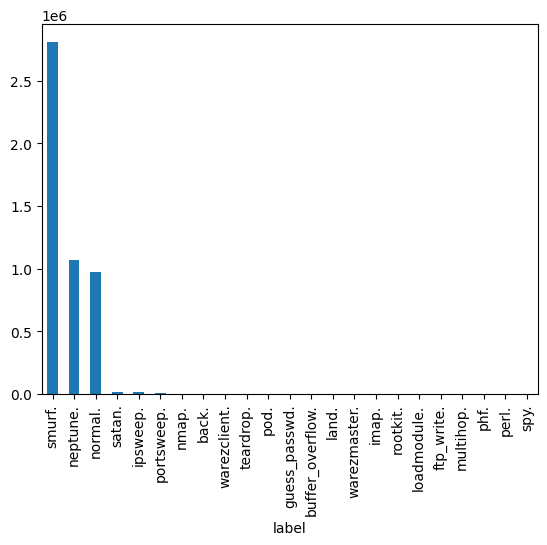

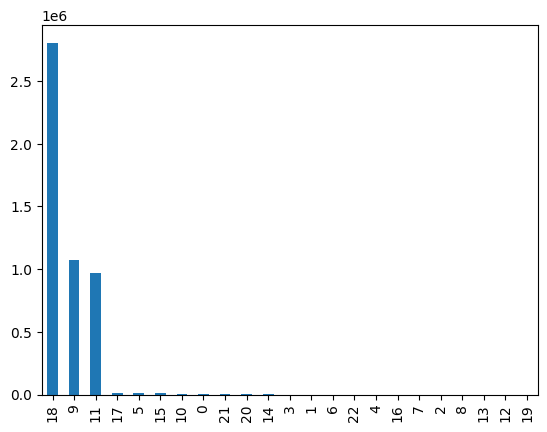

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

#bar_graph('label')
df_train_encoded['label'].value_counts().plot(kind="bar")
plt.show()

pd.Series(y).value_counts().plot(kind="bar")
plt.show()

Intrusion Detection System using One-Class SVM
Dataset: KDD Cup 1999 (Full)

In [16]:
"""
# 1
َAnomaly Detection System using One-Class SVM
Dataset: KDD Cup 1999
"""
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# پیش‌پردازش: رمزگذاری دسته‌ای و مقیاس‌بندی عددی
preprocessor = ColumnTransformer(transformers=[
                                    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
                                    ('num', StandardScaler(), numerical_features)])

# تقسیم داده‌ها به آموزش و آزمون (آموزش فقط روی normal، آزمون روی ترکیبی)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# جداسازی داده‌های normal برای آموزش OC-SVM
X_train_normal = X_train[y_train == 0]

# ایجاد پایپ‌لاین برای پیش‌پردازش و مدل
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', OneClassSVM(kernel='rbf', gamma='scale', nu=0.01))])  # nu را بر اساس نرخ آلودگی تنظیم کنید

# آموزش مدل روی داده‌های normal
print("\nشروع آموزش مدل OC_SVM")
model.fit(X_train_normal)
print("پایان آموزش مدل")

# پیش‌بینی روی داده‌های آزمون (1=normal، -1=attack)
print("\nشروع ارزیابی روی مجموعه تست")
y_pred = model.predict(X_test)
y_pred = np.where(y_pred == 1, 0, 1)  # 0=normal, 1=attack


unique_classes_test = np.unique(y_test)
existing_class_names = np.array(class_names)[np.isin(np.arange(len(class_names)), unique_classes_test)]
# ارزیابی مدل
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 100)
print("\n--- گزارش طبقه‌بندی (Classification Report) ---")
print(classification_report(y_test, y_pred, 
                          labels=unique_classes_test,
                          target_names=existing_class_names, 
                          zero_division=1))
print("\n--- ماتریس سردرگمی (Confusion Matrix) ---")
row_labels = ['Actual_' + str(name) for name in class_names]
column_labels = ['Predicted Negative', 'Predicted Positive']
cm = confusion_matrix(y_test, y_pred, labels=n_class_names)
pd.DataFrame(cm[:, :2], index = row_labels, columns = column_labels)




شروع آموزش مدل OC_SVM
پایان آموزش مدل

شروع ارزیابی روی مجموعه تست

--- گزارش طبقه‌بندی (Classification Report) ---
                  precision    recall  f1-score   support

           back.       1.00      0.93      0.96       441
buffer_overflow.       0.00      1.00      0.00         6
      ftp_write.       1.00      0.00      0.00         2
   guess_passwd.       1.00      0.00      0.00        11
           imap.       1.00      0.00      0.00         2
        ipsweep.       1.00      0.00      0.00      2496
           land.       1.00      0.00      0.00         4
     loadmodule.       1.00      0.00      0.00         2
       multihop.       1.00      0.00      0.00         1
        neptune.       1.00      0.00      0.00    214403
           nmap.       1.00      0.00      0.00       463
         normal.       1.00      0.00      0.00    194556
           perl.       1.00      0.00      0.00         1
            phf.       1.00      0.00      0.00         1
            

,Predicted Negative,Predicted Positive
Actual_back.,411,30
Actual_buffer_overflow.,0,6
Actual_ftp_write.,0,2
Actual_guess_passwd.,0,11
Actual_imap.,0,2
Actual_ipsweep.,0,2496
Actual_land.,0,4
Actual_loadmodule.,0,2
Actual_multihop.,0,1
Actual_neptune.,0,214403


تعداد کل نمونه‌ها: 	4898431
توزیع برچسب‌ها (قبل از تقسیم‌بندی):
label
Anomaly    3925650
Normal      972781
Name: count, dtype: int64

ویژگی‌های عددی قابل حذف به دلیل همبستگی بالا (> 0.90):
	 ['num_root', 'srv_count', 'srv_serror_rate', 'srv_rerror_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

ویژگی‌های عددی نهایی:
	 ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'serror_rate', 'rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_diff_srv_rate', 'dst_host_srv_diff_host_rate']


 OC-SVM training is started
 End of training

--- PCA output---
تعداد مؤلفه‌ها: 	 30
وا

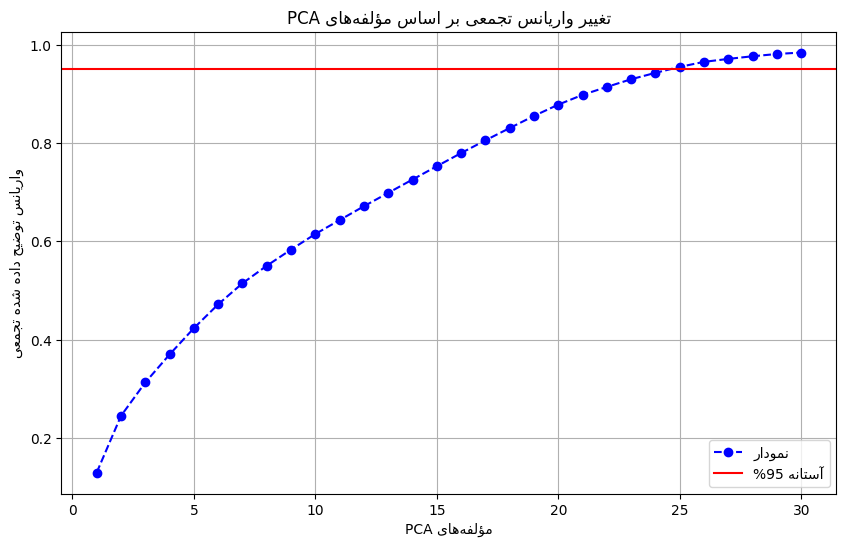

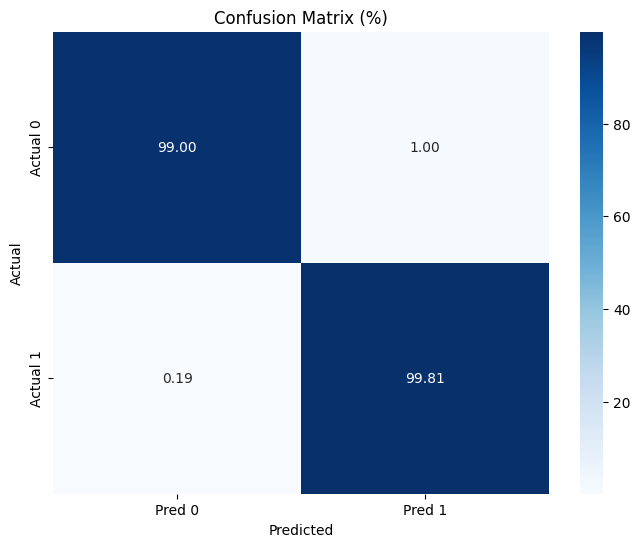

In [17]:
"""
2
َAnomaly Detection System using One-Class SVM
Dataset: KDD Cup 1999
"""
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# --- ۱. تنظیمات و بارگذاری داده ---
data_file = 'kddcup.data.gz'  

# نام ستون‌ها بر اساس مستندات KDD
column_names = ['duration','protocol_type','service','flag','src_bytes',
                'dst_bytes','land','wrong_fragment','urgent','hot',
                'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted',
                'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds',
                'is_host_login','is_guest_login','count','srv_count','serror_rate',
                'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
                'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
                'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
                'dst_host_rerror_rate','dst_host_srv_rerror_rate','label'
                ]

try:
    df = pd.read_csv(data_file, names=column_names, low_memory=False)
except FileNotFoundError:
    print(f"Error: Input file <'{data_file}'> is't find. please check input file name.")
    exit()

# --- ۲. آماده‌سازی داده ---
y = df['label'].apply(lambda x: 0 if x == 'normal.' else 1)
X = df.drop('label', axis=1)

print(f"تعداد کل نمونه‌ها: \t{df.shape[0]}")
print("توزیع برچسب‌ها (قبل از تقسیم‌بندی):")
print(y.value_counts().rename({0: 'Normal', 1: 'Anomaly'}))

# شناسایی ویژگی‌ها
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()


# الف) نرمال‌سازی موقت برای تحلیل همبستگی (فقط ویژگی‌های عددی)
## آیا تحلیل همبستگی روی همه دادها باید انجام شود یا فقط دادهای وضعیت نرمال شبکه؟؟؟؟
temp_scaler = StandardScaler()
X_num_scaled = temp_scaler.fit_transform(X[numerical_features])
X_num_scaled_df = pd.DataFrame(X_num_scaled, columns=numerical_features, index=X.index)

# ب) محاسبه همبستگی
corr_matrix = X_num_scaled_df.corr().abs()

# ج) # پیدا کردن ویژگی‌های دارای همبستگی بالا (بالاتر از 0.90)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)] # آستانه 0.90

# ویژگی‌های عددی نهایی پس از حذف همبستگی
final_numerical_features = [feat for feat in numerical_features if feat not in to_drop]

print(f"\nویژگی‌های عددی قابل حذف به دلیل همبستگی بالا (> 0.90):\n\t {to_drop}")
print(f"\nویژگی‌های عددی نهایی:\n\t {final_numerical_features}\n")

# در ادامه آموزش با استفاده از ویژگیهای غیرضرور که از روش تحلیل پی سی ای شناسایی شده است انجام میگردد.

# --- ۳. تقسیم‌بندی داده‌ها ---
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# استخراج داده‌های نرمال برای آموزش OC-SVM
X_train_normal = X_train_full[y_train_full == 0]

# --- ۴. تعریف پیش‌پردازش و پایپ‌لاین ---
preprocessor = ColumnTransformer(transformers=[
                                    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
                                    ('num', StandardScaler(), numerical_features) ],
                                    remainder='passthrough') # or remainder=='drop' # بقیه ستون‌ها را حذف می‌کند

# اضافه کردن PCA بعد از پیش‌پردازش
# مقدار n_components می‌تواند عددی ثابت یا مقداری متناسب با نسبت واریانس باشد (مثلاً 0.95 برای حفظ 95% واریانس)
# در این کد تعداد ویژگیهای حفظ شده به تعداد ثابت 20 درنظر گرفته  شده است.
pca = PCA(n_components=30, random_state=42)

model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('pca', pca),
                                 ('classifier', OneClassSVM(kernel='rbf', gamma='scale', nu=0.01))])

# --- ۵. آموزش مدل ---
print("\n OC-SVM training is started")
model_pipeline.fit(X_train_normal)
print(" End of training")

# نمایش واریانس توضیح داده‌شده توسط مؤلفه‌های PCA
explained_var = model_pipeline.named_steps['pca'].explained_variance_ratio_
cumulative_variance = np.cumsum(explained_var)
# استخراج پارامترهای PCA برای گزارش دهی
total_variance = cumulative_variance[-1]
components_90 = np.where(cumulative_variance >= 0.90)[0]
n_components_90 = components_90[0] + 1 if len(components_90) > 90 else 10
explained_90 = cumulative_variance[n_components_90 - 1]

print("\n--- PCA output---")
print(f"تعداد مؤلفه‌ها: \t {len(explained_var)}")
print(f"واریانس توضیح داده‌شده توسط هر مؤلفه: \n\t{explained_var}")
print(f"واریانس تجمعی:\n\t {explained_var.cumsum()}")
print(f"تعداد کل مولفه‌ها در پایپ‌لاین:\t {len(cumulative_variance)}")
print(f"واریانس کل توضیح داده شده توسط {len(cumulative_variance)} مولفه: {total_variance*100:.2f}%")
print(f"تعداد مولفه‌های لازم برای رسیدن به 90% واریانس:\t {n_components_90}")
print(f"واریانس توضیح داده شده توسط \t{n_components_90}\t مولفه: \t{explained_90*100:.2f}%")

# رسم نمودار Cumulative Explained Variance
plt.figure(figsize=(10, 6))

# تبدیل متن فارسی برای نمایش صحیح در Matplotlib
title_fa = get_display(arabic_reshaper.reshape("تغییر واریانس تجمعی بر اساس مؤلفه‌های PCA"))
xlabel_fa = get_display(arabic_reshaper.reshape("مؤلفه‌های PCA"))
ylabel_fa = get_display(arabic_reshaper.reshape("واریانس توضیح داده شده تجمعی"))

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title(title_fa)
plt.xlabel(xlabel_fa)
plt.ylabel(ylabel_fa)
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-', label=get_display(arabic_reshaper.reshape("95%")))
plt.legend([get_display(arabic_reshaper.reshape("نمودار"))] + [get_display(arabic_reshaper.reshape("آستانه 95%"))], loc='lower right')



# --- ۶. پیش‌بینی و ارزیابی ---
print("\nشروع ارزیابی روی مجموعه تست...")
y_pred_ocsvm = model_pipeline.predict(X_test)
y_pred_final = np.where(y_pred_ocsvm == 1, 0, 1)

print("\n--- گزارش طبقه‌بندی (Classification Report) ---")
print(classification_report(y_test, y_pred_final, target_names=['Normal (0)', 'Anomaly (1)']))

print("\n--- ماتریس سردرگمی (Confusion Matrix) ---")
# ترتیب در ماتریس: [[TN, FP], [FN, TP]] 
# # TN: نرمال واقعی که نرمال پیش‌بینی شده (True Negative) 
# # FP: نرمال واقعی که حمله پیش‌بینی شده (False Positive) 
# # FN: حمله واقعی که نرمال پیش‌بینی شده (False Negative) 
# # TP: حمله واقعی که حمله پیش‌بینی شده (True Positive)
print(pd.DataFrame(confusion_matrix(y_test, y_pred_final), 
                      index=['Actual Normal', 'Actual Anomaly'], 
                      columns=['Predicted Normal', 'Predicted Anomaly']))

cm = confusion_matrix(y_test, y_pred_final)
cm_percent_rows = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100).round(2)
labels = ['Normal', 'Anomaly'] 
cm_df = pd.DataFrame(cm_percent_rows, 
                     index=[f'Actual {labels[i]}' for i in range(len(cm))],
                     columns=[f'Predicted {labels[i]}' for i in range(len(cm))])
print(cm_df)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent_rows, 
            annot=True, 
            fmt='.2f',  # نمایش دو رقم اعشار
            cmap='Blues',
            xticklabels=[f'Pred {i}' for i in range(cm.shape[1])],
            yticklabels=[f'Actual {i}' for i in range(cm.shape[0])])
plt.title('Confusion Matrix (%)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [ ]:
"""

import warnings
warnings.filterwarnings('ignore')



        # گروه‌بندی حملات به ۵ دسته اصلی
        attack_categories = {
            'normal': 'normal',
            'dos': ['back', 'land', 'neptune', 'pod', 'smurf', 'teardrop', 'apache2', 'udpstorm', 'processtable', 'worm'],
            'probe': ['ipsweep', 'nmap', 'portsweep', 'satan', 'mscan', 'saint'],
            'r2l': ['ftp_write', 'guess_passwd', 'imap', 'multihop', 'phf', 'spy', 'warezclient', 'warezmaster',
                   'named', 'sendmail', 'snmpgetattack', 'snmpguess', 'xlock', 'xsnoop'],
            'u2r': ['buffer_overflow', 'loadmodule', 'perl', 'rootkit', 'sqlattack', 'xterm', 'ps', 'httptunnel']
        }
        
        # ایجاد برچسب دسته‌بندی
        def categorize_label(label):
            label = str(label).replace('.', '').strip()
            for category, attacks in attack_categories.items():
                if category == 'normal' and label == 'normal':
                    return 'normal'
                elif category != 'normal' and label in attacks:
                    return category
            return 'other'
        
        df['attack_category'] = df['label'].apply(categorize_label)
        
        # آمار دسته‌بندی
        category_stats = df['attack_category'].value_counts()
        print("توزیع دسته‌های حمله:")
        for category, count in category_stats.items():
            percentage = (count / len(df)) * 100
            print(f"   {category}: {count:,} ({percentage:.2f}%)")
        



    def remove_outliers_iqr(self, df, feature_columns, threshold=3):
        # حذف outliers با استفاده از IQR
        print("\n🧹 در حال حذف outliers...")
        
        original_size = len(df)
        Q1 = df[feature_columns].quantile(0.25)
        Q3 = df[feature_columns].quantile(0.75)
        IQR = Q3 - Q1
        
        # فیلتر outliers
        mask = ~((df[feature_columns] < (Q1 - threshold * IQR)) | 
                (df[feature_columns] > (Q3 + threshold * IQR))).any(axis=1)
        
        df_clean = df[mask]
        
        print(f"   نمونه‌های حذف شده: {original_size - len(df_clean):,}")
        print(f"   نمونه‌های باقی‌مانده: {len(df_clean):,} ({len(df_clean)/original_size*100:.1f}%)")
        
        return df_clean




    def optimize_hyperparameters(self, X_train, param_grid=None):
        # بهینه‌سازی هیپرپارامترها با Grid Search
        print("\n🔧 شروع بهینه‌سازی هیپرپارامترها...")
        
        if param_grid is None:
            param_grid = {
                'nu': [0.01, 0.05, 0.1, 0.15, 0.2],
                'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
                'kernel': ['rbf', 'linear', 'poly']
            }



        # ایجاد یک نمونه تست (اتصال عادی)
        sample_connection = {
            'duration': 0,
            'protocol_type': 'tcp',
            'service': 'http',
            'flag': 'SF',
            'src_bytes': 215,
            'dst_bytes': 45076,
            'land': 0,
            'wrong_fragment': 0,
            'urgent': 0,
            'hot': 0,
            'num_failed_logins': 0,
            'logged_in': 1,
            'num_compromised': 0,
            'root_shell': 0,
            'su_attempted': 0,
            'num_root': 0,
            'num_file_creations': 0,
            'num_shells': 0,
            'num_access_files': 0,
            'num_outbound_cmds': 0,
            'is_host_login': 0,
            'is_guest_login': 0,
            'count': 1,
            'srv_count': 1,
            'serror_rate': 0.0,
            'srv_serror_rate': 0.0,
            'rerror_rate': 0.0,
            'srv_rerror_rate': 0.0,
            'same_srv_rate': 1.0,
            'diff_srv_rate': 0.0,
            'srv_diff_host_rate': 0.0,
            'dst_host_count': 0,
            'dst_host_srv_count': 0,
            'dst_host_same_srv_rate': 0.0,
            'dst_host_diff_srv_rate': 0.0,
            'dst_host_same_src_port_rate': 0.0,
            'dst_host_srv_diff_host_rate': 0.0,
            'dst_host_serror_rate': 0.0,
            'dst_host_srv_serror_rate': 0.0,
            'dst_host_rerror_rate': 0.0,
            'dst_host_srv_rerror_rate': 0.0
        }
        
        result = predict_single_connection(model, preprocessor, sample_connection)
        print(f"\nنتایج پیش‌بینی:")
        for key, value in result.items():
            print(f"  {key}: {value}")


"""

# XGBoost Classifier

تعداد کل نمونه‌ها: 	4898431
توزیع برچسب‌ها (قبل از تقسیم‌بندی):
label
Anomaly    3925650
Normal      972781
Name: count, dtype: int64

تعداد داده‌های آموزش: 3918744
تعداد داده‌های آزمون: 979687

آغاز آموزش مدل XGBoost برای تشخیص حمله سایبری...
مدل با موفقیت آموزش داده شد

پیش‌بینی بر روی داده‌های آزمون...

 دقت مدل روی مجموعه آزمون: 100.00%


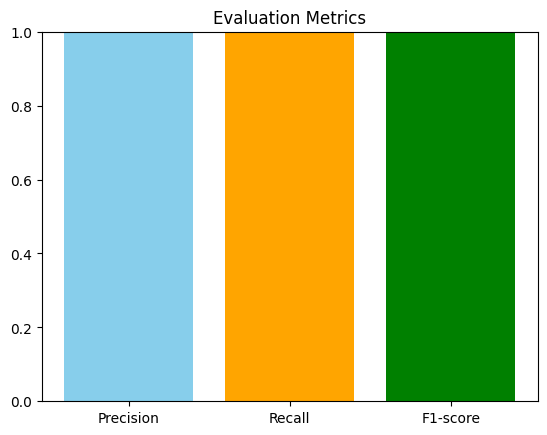


 گزارش طبقه‌بندی:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00    194556
     Anomaly       1.00      1.00      1.00    785131

    accuracy                           1.00    979687
   macro avg       1.00      1.00      1.00    979687
weighted avg       1.00      1.00      1.00    979687


 ماتریس درهم‌ریختگی (Confusion Matrix):
[[194554      2]
 [    21 785110]]

 ویژگی‌های مهم در تشخیص:


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
# import warnings

# warnings.filterwarnings("default")#("ignore", category=FutureWarning, module="XGBClassifier")

data_file = 'kddcup.data.gz'

# نام ستون‌ها بر اساس مستندات KDD
column_names = ['duration','protocol_type','service','flag','src_bytes',
                'dst_bytes','land','wrong_fragment','urgent','hot',
                'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted',
                'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds',
                'is_host_login','is_guest_login','count','srv_count','serror_rate',
                'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
                'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
                'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
                'dst_host_rerror_rate','dst_host_srv_rerror_rate','label'
                ]

try:
    df = pd.read_csv(data_file, names=column_names, low_memory=False)
except FileNotFoundError:
    print(f"Error: Input file <'{data_file}'> isn't found. please check input file name.")
    exit()

# --- ۲. آماده‌سازی داده ---
# تعریف برچسب هدف: نرمال = 0، حمله (anomaly) = 1
y = df['label'].apply(lambda x: 0 if x == 'normal.' else 1)
X = df.drop('label', axis=1)

print(f"تعداد کل نمونه‌ها: \t{df.shape[0]}")
print("توزیع برچسب‌ها (قبل از تقسیم‌بندی):")
print(y.value_counts().rename({0: 'Normal', 1: 'Anomaly'}))

# --- ۳. تبدیل ویژگی‌های متنی به عددی ---
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()
categorical_cols = categorical_features #['protocol_type', 'service', 'flag']

encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le

# --- ۴. تقسیم داده به آموزش و آزمون ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nتعداد داده‌های آموزش: {X_train.shape[0]}")
print(f"تعداد داده‌های آزمون: {X_test.shape[0]}")

# --- ۵. ساخت و آموزش مدل XGBoost ---
# تنظیم پارامترها برای سرعت و دقت متعادل
xgb_model = XGBClassifier(
    n_estimators=200,       # تعداد درخت‌ها
    learning_rate=0.1,      # نرخ یادگیری
    max_depth=8,            # عمق درخت‌ها
    subsample=0.8,          # درصد نمونه‌ها برای هر درخت
    colsample_bytree=0.8,   # درصد ویژگی‌ها برای هر درخت
    gamma=0,                # جریمه تقسیم‌های نابجا
    reg_lambda=1,           # منظم‌سازی L2
    reg_alpha=0,            # منظم‌سازی L1
    scale_pos_weight=1,     # برای بالانس کلاس‌ها
    random_state=42,
    tree_method='hist',     # سریع‌تر برای داده‌های بزرگ
    # use_label_encoder=False,
    eval_metric='logloss'
)

print("\nآغاز آموزش مدل XGBoost برای تشخیص حمله سایبری...")
xgb_model.fit(X_train, y_train)
print("مدل با موفقیت آموزش داده شد")

# --- ۶. ارزیابی مدل ---
print("\nپیش‌بینی بر روی داده‌های آزمون...")
y_pred = xgb_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"\n دقت مدل روی مجموعه آزمون: {acc*100:.2f}%")

metrics = {
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-score": f1_score(y_test, y_pred)
}

plt.bar(metrics.keys(), metrics.values(), color=['skyblue','orange','green'])
plt.title("Evaluation Metrics")
plt.ylim(0,1)
plt.show()

print("\n گزارش طبقه‌بندی:")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Anomaly']))

print("\n ماتریس درهم‌ریختگی (Confusion Matrix):")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# --- ۷. اهمیت ویژگی‌ها ---
print("\n ویژگی‌های مهم در تشخیص:")
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)


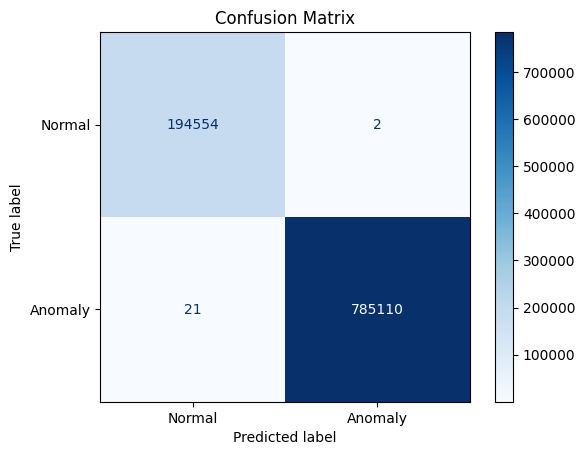

                Predicted Normal  Predicted Anomaly
Actual Normal              100.0                0.0
Actual Anomaly               0.0              100.0


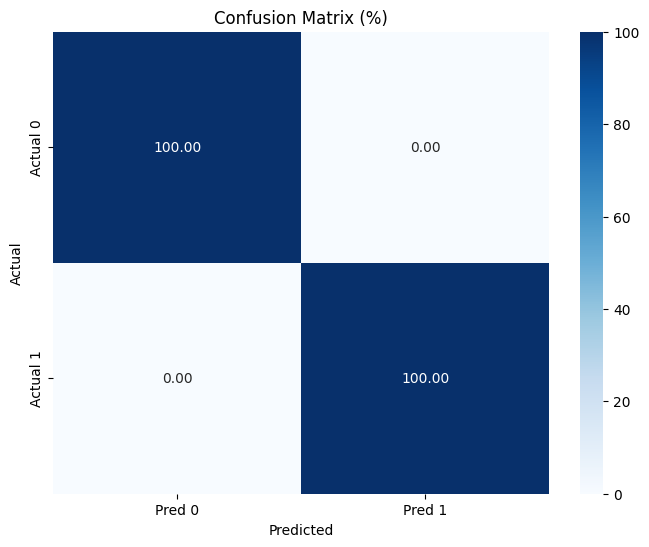

In [5]:
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns


# cm = confusion_matrix(y_test, y_pred)
labels = ['Normal', 'Anomaly'] 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

cm_percent_rows = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100).round(2)

cm_df = pd.DataFrame(cm_percent_rows, 
                     index=[f'Actual {labels[i]}' for i in range(len(cm))],
                     columns=[f'Predicted {labels[i]}' for i in range(len(cm))])
print(cm_df)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent_rows, 
            annot=True, 
            fmt='.2f',  # نمایش دو رقم اعشار
            cmap='Blues',
            xticklabels=[f'Pred {i}' for i in range(cm.shape[1])],
            yticklabels=[f'Actual {i}' for i in range(cm.shape[0])])
plt.title('Confusion Matrix (%)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

                        Feature  Importance
22                        count    0.894665
38     dst_host_srv_serror_rate    0.029365
5                     dst_bytes    0.023688
1                 protocol_type    0.007560
25              srv_serror_rate    0.005898
36  dst_host_srv_diff_host_rate    0.005549
12              num_compromised    0.004554
37         dst_host_serror_rate    0.003478
7                wrong_fragment    0.002968
24                  serror_rate    0.002703


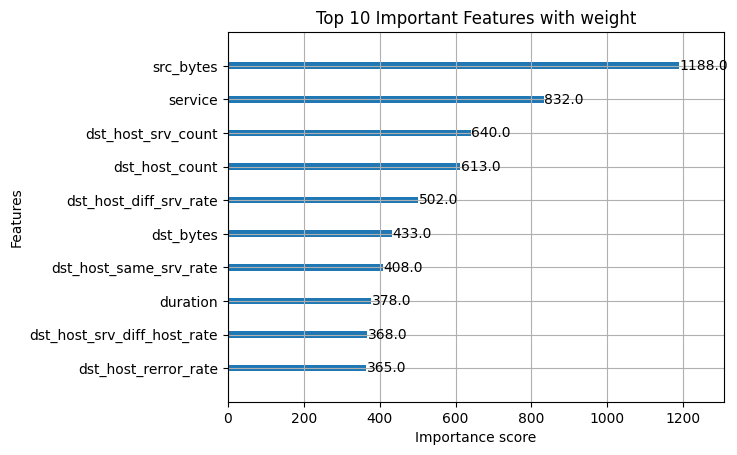

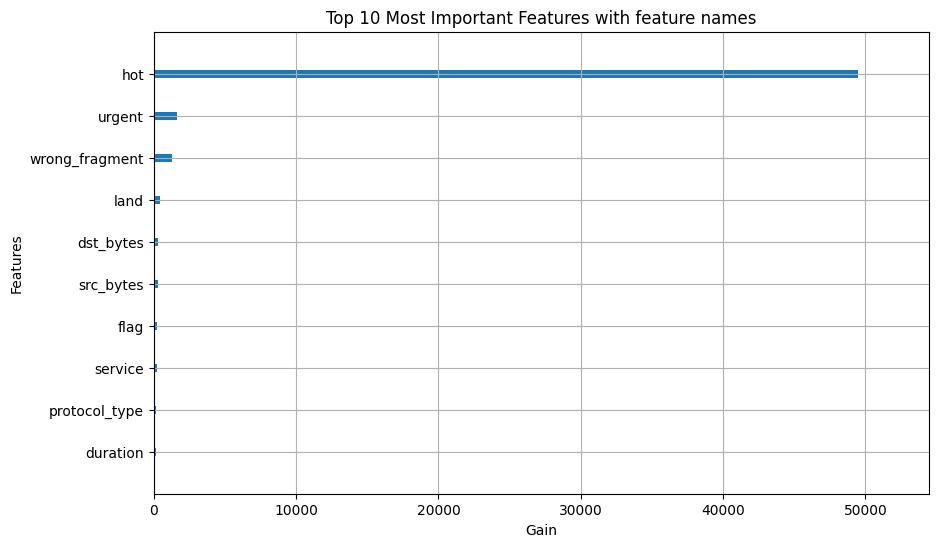

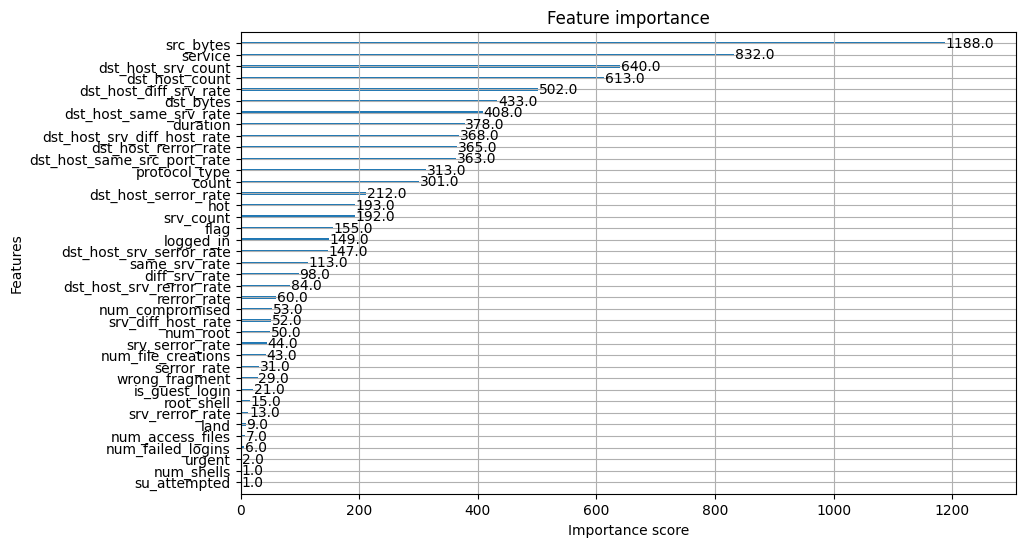

In [8]:
# Set the number of top features to plot
top_n = 10

print(importance_df.head(top_n))

plot_importance(xgb_model, max_num_features=10, importance_type='weight')
plt.title("Top 10 Important Features with weight")
plt.show()

# Plot feature importance with feature names
fig, ax = plt.subplots(figsize=(10, 6))
plot_importance(xgb_model, ax=ax, importance_type='gain', max_num_features=top_n, show_values=False)
plt.yticks(range(top_n), xgb_model.feature_names_in_[:top_n])
plt.xlabel('Gain')
plt.title(f'Top {top_n} Most Important Features with feature names')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
plot_importance(xgb_model, ax=ax)
plt.show()



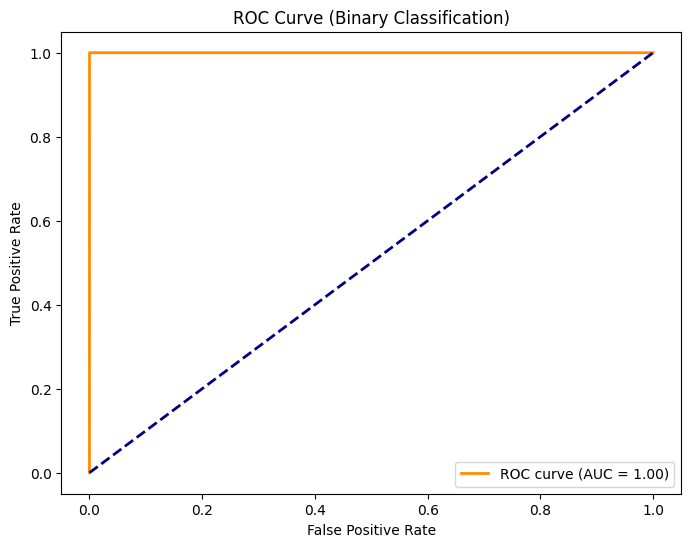

In [10]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = xgb_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Binary Classification)')
plt.legend(loc="lower right")
plt.show()


In [11]:
print(xgb_model.get_booster().get_dump()[0])


0:[count<56] yes=1,no=2,missing=2
	1:[dst_host_srv_serror_rate<0.889999986] yes=3,no=4,missing=4
		3:[dst_host_srv_diff_host_rate<0.5] yes=7,no=8,missing=8
			7:[src_bytes<30] yes=15,no=16,missing=16
				15:[service<26] yes=23,no=24,missing=24
					23:[service<18] yes=35,no=36,missing=36
						35:[service<13] yes=51,no=52,missing=52
							51:[dst_host_srv_rerror_rate<0.870000005] yes=71,no=72,missing=72
								71:leaf=-0.50049299
								72:leaf=-0.0317084305
							52:leaf=0.123685539
						36:[dst_host_serror_rate<0.879999995] yes=53,no=54,missing=54
							53:[dst_bytes<38299] yes=73,no=74,missing=74
								73:leaf=-0.501877844
								74:leaf=0.0332008563
							54:[dst_host_srv_serror_rate<0.0500000007] yes=75,no=76,missing=76
								75:leaf=-0.328706056
								76:leaf=0.103363089
					24:[dst_host_same_srv_rate<0.5] yes=37,no=38,missing=38
						37:[service<54] yes=55,no=56,missing=56
							55:[dst_host_serror_rate<0.479999989] yes=77,no=78,missing=78
								77:leaf=0.1244

In [ ]:
from xgboost import to_graphviz
import matplotlib.pyplot as plt
import graphviz

dot_data = to_graphviz(xgb_model, num_trees=0)
print(dot_data.source)

#graph = graphviz.Source(dot_data)
#graph.render("tree", format="png", cleanup=True) 


digraph {
    graph [ rankdir=TB ]

    0 [ label="count<56" ]
    0 -> 1 [label="yes" color="#FF0000"]
    0 -> 2 [label="no, missing" color="#0000FF"]

    1 [ label="dst_host_srv_serror_rate<0.889999986" ]
    1 -> 3 [label="yes" color="#FF0000"]
    1 -> 4 [label="no, missing" color="#0000FF"]

    3 [ label="dst_host_srv_diff_host_rate<0.5" ]
    3 -> 7 [label="yes" color="#FF0000"]
    3 -> 8 [label="no, missing" color="#0000FF"]

    7 [ label="src_bytes<30" ]
    7 -> 15 [label="yes" color="#FF0000"]
    7 -> 16 [label="no, missing" color="#0000FF"]

    15 [ label="service<26" ]
    15 -> 23 [label="yes" color="#FF0000"]
    15 -> 24 [label="no, missing" color="#0000FF"]

    23 [ label="service<18" ]
    23 -> 35 [label="yes" color="#FF0000"]
    23 -> 36 [label="no, missing" color="#0000FF"]

    35 [ label="service<13" ]
    35 -> 51 [label="yes" color="#FF0000"]
    35 -> 52 [label="no, missing" color="#0000FF"]

    51 [ label="dst_host_srv_rerror_rate<0.870000005" ]
    